### 1. Importar les llibreries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import pickle
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

****
### 2. Carregar el dataset

In [112]:
df = pd.read_csv('https://raw.githubusercontent.com/Nicolakorff/Projecte-Machine-Learning/refs/heads/main/bank_dataset_wins.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1033,1,-1.0,0.0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1033,1,-1.0,0.0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1033,1,-1.0,0.0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1.0,0.0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1.0,0.0,unknown,yes


****
### 3. Divisió del dataset

In [113]:
# comprovar el balanç de classes
print(df['deposit'].value_counts(normalize=True) * 100)

deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64


In [114]:
# Després de comprovar el balanç de les classes es divideix el dataset en conjunts d'entrenament i prova en un 80/20.
# S'ha considerat el 80/20 el més adient per la quatitat de dades, el balaç de les classes i tipus diferent de dades.

# Definició de característicques (X) y variable de resultat (y).
X = df.drop(columns='deposit')  # Característiques
y = df['deposit']  # Variable de resultat

# Divisió en entrenamient (80%) y proba (20%) amb estratificació
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Verificar que la proporció de classes es mante en els dos conjunts
print("Grandària del conjunt d'entrenament (train):")
print(y_train.value_counts(normalize=True))
print("Grandària del conjunt de prova (test):")
print(y_test.value_counts(normalize=True))

Grandària del conjunt d'entrenament (train):
deposit
no     0.526151
yes    0.473849
Name: proportion, dtype: float64
Grandària del conjunt de prova (test):
deposit
no     0.526198
yes    0.473802
Name: proportion, dtype: float64


In [115]:
# Desar els conjunts en fitxers CSV
X_train.to_csv('bank_dataset_X_train.csv', index=False)
X_test.to_csv('bank_dataset_X_test.csv', index=False)
y_train.to_csv('bank_dataset_y_train.csv', index=False)
y_test.to_csv('bank_dataset_y_test.csv', index=False)

# Per facilitar el codi anomenem X_train = train ; X_test = test

train = X_train
test = X_test

# Comprovar les primeres files dels conjunts
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4868,26.0,technician,single,secondary,no,181,no,no,cellular,20,apr,158,2,-1.000,0.0,unknown
486,26.0,services,single,secondary,no,-189,no,yes,cellular,17,jul,538,2,-1.000,0.0,unknown
2466,59.0,retired,divorced,tertiary,no,3444,no,no,cellular,10,aug,252,1,53.375,2.0,success
5952,43.0,housemaid,married,primary,no,0,yes,no,cellular,25,aug,152,3,-1.000,0.0,unknown
1721,25.0,student,single,secondary,no,1608,no,no,cellular,30,apr,664,2,-1.000,0.0,unknown


In [116]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
8771,25.0,admin.,single,secondary,no,483,no,yes,cellular,30,apr,68,1,53.375,1.0,success
2823,74.5,retired,married,secondary,no,4087,no,no,telephone,23,oct,282,2,-1.000,0.0,unknown
9911,28.0,services,married,secondary,no,4,yes,no,unknown,27,jun,133,5,-1.000,0.0,unknown
5111,27.0,admin.,married,secondary,no,1595,no,no,cellular,29,dec,196,2,53.375,2.0,success
5682,36.0,management,single,tertiary,no,13,no,yes,cellular,18,nov,106,1,-1.000,0.0,unknown


- S' ajusta els conjunts train i test en transformació/codificació de variables.
- Inicialment s'aplica l'escalador unicament al conjunt de train i s´aplicar posteriorment sense ajustar al conjunt de test.

****
### 4. Transformar variables categóriques

In [117]:
# Label Encoding per 'education', 'month', 'poutcome' al ser valors ordinaris 
# Veure els valors únics a la columna 'month'
unique_month_train = train['month'].unique()
print(unique_month_train)

['apr' 'jul' 'aug' 'nov' 'jun' 'jan' 'may' 'oct' 'feb' 'dec' 'sep' 'mar']


In [118]:
# Us de OrdinalEncoder 
train2=train
test2=test
# Ordre específic
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Configurar l'OrdinalEncoder amb l'ordre desitjat
ordinal_encoder = OrdinalEncoder(categories=[month_order])
# Ajustar i transformar la columna
train2['month_encoded'] = ordinal_encoder.fit_transform(train[['month']])
test2['month_encoded'] = ordinal_encoder.fit_transform(test[['month']])

In [119]:
train2['month_encoded'] = train2['month_encoded'].astype(int)
test2['month_encoded'] = test2['month_encoded'].astype(int)

In [120]:
# Verificar les etiquetes amb els sus codis
print(train2[['month', 'month_encoded']].drop_duplicates())   
print(test2[['month', 'month_encoded']].drop_duplicates())

      month  month_encoded
4868    apr              3
486     jul              6
2466    aug              7
8789    nov             10
10804   jun              5
11010   jan              0
8481    may              4
7949    oct              9
4759    feb              1
3003    dec             11
3982    sep              8
1348    mar              2
      month  month_encoded
8771    apr              3
2823    oct              9
9911    jun              5
5111    dec             11
5682    nov             10
7405    jul              6
11011   may              4
1200    feb              1
7776    aug              7
4480    mar              2
8745    jan              0
10742   sep              8


In [121]:
# Eliminar columnes originals:
train2.drop("month", axis="columns", inplace=True)
test2.drop("month", axis="columns", inplace=True)

# Verificació
train2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,month_encoded
4868,26.0,technician,single,secondary,no,181,no,no,cellular,20,158,2,-1.000,0.0,unknown,3
486,26.0,services,single,secondary,no,-189,no,yes,cellular,17,538,2,-1.000,0.0,unknown,6
2466,59.0,retired,divorced,tertiary,no,3444,no,no,cellular,10,252,1,53.375,2.0,success,7
5952,43.0,housemaid,married,primary,no,0,yes,no,cellular,25,152,3,-1.000,0.0,unknown,7
1721,25.0,student,single,secondary,no,1608,no,no,cellular,30,664,2,-1.000,0.0,unknown,3


In [122]:
test2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,month_encoded
8771,25.0,admin.,single,secondary,no,483,no,yes,cellular,30,68,1,53.375,1.0,success,3
2823,74.5,retired,married,secondary,no,4087,no,no,telephone,23,282,2,-1.000,0.0,unknown,9
9911,28.0,services,married,secondary,no,4,yes,no,unknown,27,133,5,-1.000,0.0,unknown,5
5111,27.0,admin.,married,secondary,no,1595,no,no,cellular,29,196,2,53.375,2.0,success,11
5682,36.0,management,single,tertiary,no,13,no,yes,cellular,18,106,1,-1.000,0.0,unknown,10


In [123]:
# Veure els valors únics a la columna 'education'
unique_education_train = train2['education'].unique()
print(unique_education_train)

['secondary' 'tertiary' 'primary' 'unknown']


In [124]:
# Us del mappeig manual, per endreçar ordinalment escullint l'enumaració
# Especificar l'ordre amb el diccionari
education_map = {'secondary': 2, 'tertiary': 3, 'primary': 1, 'unknown': 0}

# Aplicar el mappeig a la columna
train2['education_encoded'] = train2['education'].map(education_map)
test2['education_encoded'] = test2['education'].map(education_map)

# Verificar les etiquetes amb els sus codis
print(train2[['education', 'education_encoded']].drop_duplicates())
print(test2[['education', 'education_encoded']].drop_duplicates())

      education  education_encoded
4868  secondary                  2
2466   tertiary                  3
5952    primary                  1
5250    unknown                  0
       education  education_encoded
8771   secondary                  2
5682    tertiary                  3
11097    primary                  1
3784     unknown                  0


In [125]:
# Eliminar columnes originals:
train2.drop("education", axis="columns", inplace=True)
test2.drop("education", axis="columns", inplace=True)

In [128]:
# Veure els valors únics a la columna 'poutcome'
unique_poutcome = train2['poutcome'].unique()
print(unique_poutcome)

['unknown' 'success' 'other' 'failure']


In [129]:
# Us del mappeig manual
# Especificar l'ordre amb el diccionari
poutcome_map = {'success': 3, 'failure': 2, 'other': 1, 'unknown': 0}

# Aplicar el mappeig a la columna
train2['poutcome_encoded'] = train2['poutcome'].map(poutcome_map)
test2['poutcome_encoded'] = test2['poutcome'].map(poutcome_map)

# Verificar les etiquetes amb els sus codis
print(train2[['poutcome', 'poutcome_encoded']].drop_duplicates())
print(test2[['poutcome', 'poutcome_encoded']].drop_duplicates())

     poutcome  poutcome_encoded
4868  unknown                 0
2466  success                 3
3780    other                 1
7949  failure                 2
     poutcome  poutcome_encoded
8771  success                 3
2823  unknown                 0
4319  failure                 2
3715    other                 1


In [130]:
# Eliminar columnes originals:
train2.drop("poutcome", axis="columns", inplace=True)
test2.drop("poutcome", axis="columns", inplace=True)

In [131]:
# Transformació de la variable 'job' fent una agrupació de les categories per reduir dimensionalitat
unique_job = train2['job'].unique()
print(unique_job)

['technician' 'services' 'retired' 'housemaid' 'student' 'management'
 'unemployed' 'admin.' 'self-employed' 'entrepreneur' 'blue-collar'
 'unknown']


In [132]:
# Agrupació de la variable 'job'
# Mappeig
job_groups = {
    'admin.': 'employee',
    'blue-collar': 'employee',
    'technician': 'employee',
    'management': 'employee',
    'services': 'employee',
    'entrepreneur': 'freelance',
    'self-employed': 'freelance',
    'student': 'other',
    'retired': 'retired',
    'unemployed': 'other',
    'housemaid': 'employee',
    'unknown': 'other'
}

In [133]:
# Aplicar el mappeig per agrupar categories
train2['job_grouped'] = train2['job'].map(job_groups)
test2['job_grouped'] = test2['job'].map(job_groups)

# Verificar la nova columna
print(train2[['job', 'job_grouped']].drop_duplicates()) 
print(test2[['job', 'job_grouped']].drop_duplicates()) 

                job job_grouped
4868     technician    employee
486        services    employee
2466        retired     retired
5952      housemaid    employee
1721        student       other
8789     management    employee
3819     unemployed       other
7949         admin.    employee
4962  self-employed   freelance
4870   entrepreneur   freelance
9634    blue-collar    employee
3253        unknown       other
                job job_grouped
8771         admin.    employee
2823        retired     retired
9911       services    employee
5682     management    employee
7405  self-employed   freelance
3772     technician    employee
2609     unemployed       other
5243    blue-collar    employee
3511        unknown       other
2069      housemaid    employee
3326        student       other
9393   entrepreneur   freelance


In [134]:
# Convertir a valors numerics
job_group_mapping = {'employee': 2, 'freelance': 1, 'retired': 0, 'other': 3}
train2['job_grouped_encoded'] = train2['job_grouped'].map(job_group_mapping)
test2['job_grouped_encoded'] = test2['job_grouped'].map(job_group_mapping)

# Verificar los valores codificados
print(train2[['job_grouped', 'job_grouped_encoded']].drop_duplicates())
print(test2[['job_grouped', 'job_grouped_encoded']].drop_duplicates())

     job_grouped  job_grouped_encoded
4868    employee                    2
2466     retired                    0
1721       other                    3
4962   freelance                    1
     job_grouped  job_grouped_encoded
8771    employee                    2
2823     retired                    0
7405   freelance                    1
2609       other                    3


In [135]:
# Eliminar columnes originals:
train2.drop("job", axis="columns", inplace=True)
test2.drop("job", axis="columns", inplace=True)

# Verificació:
train2.head()

,age,marital,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped,job_grouped_encoded
4868,26.0,single,no,181,no,no,cellular,20,158,2,-1.000,0.0,3,2,0,employee,2
486,26.0,single,no,-189,no,yes,cellular,17,538,2,-1.000,0.0,6,2,0,employee,2
2466,59.0,divorced,no,3444,no,no,cellular,10,252,1,53.375,2.0,7,3,3,retired,0
5952,43.0,married,no,0,yes,no,cellular,25,152,3,-1.000,0.0,7,1,0,employee,2
1721,25.0,single,no,1608,no,no,cellular,30,664,2,-1.000,0.0,3,2,0,other,3


In [136]:
test2.head()

,age,marital,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped,job_grouped_encoded
8771,25.0,single,no,483,no,yes,cellular,30,68,1,53.375,1.0,3,2,3,employee,2
2823,74.5,married,no,4087,no,no,telephone,23,282,2,-1.000,0.0,9,2,0,retired,0
9911,28.0,married,no,4,yes,no,unknown,27,133,5,-1.000,0.0,5,2,0,employee,2
5111,27.0,married,no,1595,no,no,cellular,29,196,2,53.375,2.0,11,2,3,employee,2
5682,36.0,single,no,13,no,yes,cellular,18,106,1,-1.000,0.0,10,3,0,employee,2


In [137]:
# One-Hot Encoding per 'loan', 'housing', 'deafult', 'marital', 'contact', ja que no es poden ordenar de foma ordinal
train3 = train2
test3 = test2

In [138]:
# Utilitzar get_dummies per a 'loan', 'housing', 'deafult', 'deposit', al ser columnes amb valors binaris
train3 = pd.get_dummies(train3, columns=['loan'], prefix='loan')
train3 = pd.get_dummies(train3, columns=['housing'], prefix='housing')
train3 = pd.get_dummies(train3, columns=['default'], prefix='default')
test3 = pd.get_dummies(test3, columns=['loan'], prefix='loan')
test3 = pd.get_dummies(test3, columns=['housing'], prefix='housing')
test3 = pd.get_dummies(test3, columns=['default'], prefix='default')

In [139]:
# Verificar les etiquetes amb els sus codis
print(train3[['loan_yes', 'loan_no']].drop_duplicates())
print(test3[['loan_yes', 'loan_no']].drop_duplicates())
print(train3[['housing_yes', 'housing_no']].drop_duplicates())
print(test3[['housing_yes', 'housing_no']].drop_duplicates())
print(train3[['default_yes', 'default_no']].drop_duplicates())
print(test3[['default_yes', 'default_no']].drop_duplicates())

      loan_yes  loan_no
4868     False     True
486       True    False
      loan_yes  loan_no
8771      True    False
2823     False     True
      housing_yes  housing_no
4868        False        True
5952         True       False
      housing_yes  housing_no
8771        False        True
9911         True       False
      default_yes  default_no
4868        False        True
7494         True       False
      default_yes  default_no
8771        False        True
7373         True       False


In [140]:
# Verificació
train3.head()

,age,marital,balance,contact,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped,job_grouped_encoded,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes
4868,26.0,single,181,cellular,20,158,2,-1.000,0.0,3,2,0,employee,2,True,False,True,False,True,False
486,26.0,single,-189,cellular,17,538,2,-1.000,0.0,6,2,0,employee,2,False,True,True,False,True,False
2466,59.0,divorced,3444,cellular,10,252,1,53.375,2.0,7,3,3,retired,0,True,False,True,False,True,False
5952,43.0,married,0,cellular,25,152,3,-1.000,0.0,7,1,0,employee,2,True,False,False,True,True,False
1721,25.0,single,1608,cellular,30,664,2,-1.000,0.0,3,2,0,other,3,True,False,True,False,True,False


In [141]:
test3.head()

,age,marital,balance,contact,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped,job_grouped_encoded,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes
8771,25.0,single,483,cellular,30,68,1,53.375,1.0,3,2,3,employee,2,False,True,True,False,True,False
2823,74.5,married,4087,telephone,23,282,2,-1.000,0.0,9,2,0,retired,0,True,False,True,False,True,False
9911,28.0,married,4,unknown,27,133,5,-1.000,0.0,5,2,0,employee,2,True,False,False,True,True,False
5111,27.0,married,1595,cellular,29,196,2,53.375,2.0,11,2,3,employee,2,True,False,True,False,True,False
5682,36.0,single,13,cellular,18,106,1,-1.000,0.0,10,3,0,employee,2,False,True,True,False,True,False


In [142]:
train4=train3
test4=test3

# Inicialitzar el OneHotEncoder
encoder = OneHotEncoder()

# Aplicar l'encoder a la columna 'marital' i convertir en un array
marital_encoded_train = encoder.fit_transform(train4[['marital']]).toarray()
marital_encoded_test = encoder.fit_transform(test4[['marital']]).toarray()

# Crear un DataFrame amb les columnes codificades i unir-les al DataFrame original
marital_encoded_train4 = pd.DataFrame(marital_encoded_train, columns=encoder.get_feature_names_out(['marital']))
train4 = pd.concat([train4, marital_encoded_train4], axis=1)
marital_encoded_test4 = pd.DataFrame(marital_encoded_test, columns=encoder.get_feature_names_out(['marital']))
test4 = pd.concat([test4, marital_encoded_test4], axis=1)

# Verificar les columnes generades
print(encoder.get_feature_names_out(['marital']))

['marital_divorced' 'marital_married' 'marital_single' 'marital_unknown']


In [143]:
# Aplicar l'encoder a la columna 'marital' i convertir en un array
contact_encoded_train = encoder.fit_transform(train4[['contact']]).toarray()
contact_encoded_test = encoder.fit_transform(test4[['contact']]).toarray()

# Crear un DataFrame amb les columnes codificades i unir-les al DataFrame original
contact_encoded_train4 = pd.DataFrame(contact_encoded_train, columns=encoder.get_feature_names_out(['contact']))
train4 = pd.concat([train4, contact_encoded_train4], axis=1)
contact_encoded_test4 = pd.DataFrame(contact_encoded_test, columns=encoder.get_feature_names_out(['contact']))
train4 = pd.concat([test4, contact_encoded_test4], axis=1)

# Verificar les columnes generades
print(encoder.get_feature_names_out(['contact']))

['contact_cellular' 'contact_telephone' 'contact_unknown' 'contact_nan']


In [144]:
# Eliminar columnes originals:
train4.drop("marital", axis="columns", inplace=True)
test4.drop("marital", axis="columns", inplace=True)
train4.drop("contact", axis="columns", inplace=True)
test4.drop("contact", axis="columns", inplace=True)

# Verificar:
train4.head()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,...,default_no,default_yes,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown,contact_nan
8771,25.0,483.0,30.0,68.0,1.0,53.375,1.0,3.0,2.0,3.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823,74.5,4087.0,23.0,282.0,2.0,-1.000,0.0,9.0,2.0,0.0,...,True,False,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
9911,28.0,4.0,27.0,133.0,5.0,-1.000,0.0,5.0,2.0,0.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5111,27.0,1595.0,29.0,196.0,2.0,53.375,2.0,11.0,2.0,3.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5682,36.0,13.0,18.0,106.0,1.0,-1.000,0.0,10.0,3.0,0.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
test4.head()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,...,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes,marital_divorced,marital_married,marital_single,marital_unknown
8771,25.0,483.0,30.0,68.0,1.0,53.375,1.0,3.0,2.0,3.0,...,False,True,True,False,True,False,NaN,NaN,NaN,NaN
2823,74.5,4087.0,23.0,282.0,2.0,-1.000,0.0,9.0,2.0,0.0,...,True,False,True,False,True,False,NaN,NaN,NaN,NaN
9911,28.0,4.0,27.0,133.0,5.0,-1.000,0.0,5.0,2.0,0.0,...,True,False,False,True,True,False,NaN,NaN,NaN,NaN
5111,27.0,1595.0,29.0,196.0,2.0,53.375,2.0,11.0,2.0,3.0,...,True,False,True,False,True,False,NaN,NaN,NaN,NaN
5682,36.0,13.0,18.0,106.0,1.0,-1.000,0.0,10.0,3.0,0.0,...,False,True,True,False,True,False,NaN,NaN,NaN,NaN


In [147]:
# Desar el DataFrame estandarditzat en un fitxer CSV
train4.to_csv('bank_dataset_X_train_stand.csv', index=False)
test4.to_csv('bank_dataset_X_test_stand.csv', index=False)

****
### 5. Estandarització o Normalització de les dades

**5.1 Tractactament d'outliers al conjunt train**

In [149]:
## Detecció d'outliers
# Llistar columnes a detectar outliers
columns_to_check = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

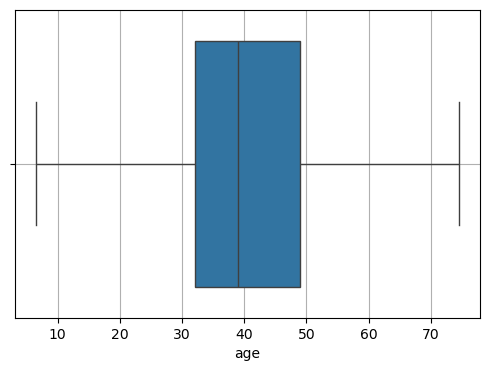

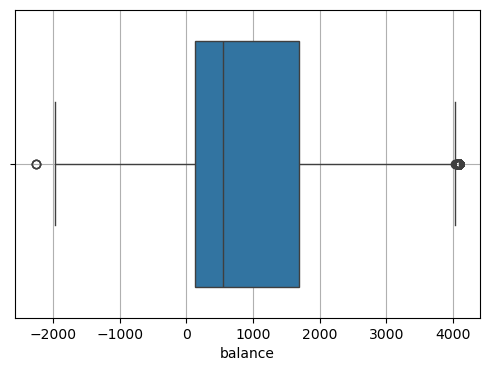

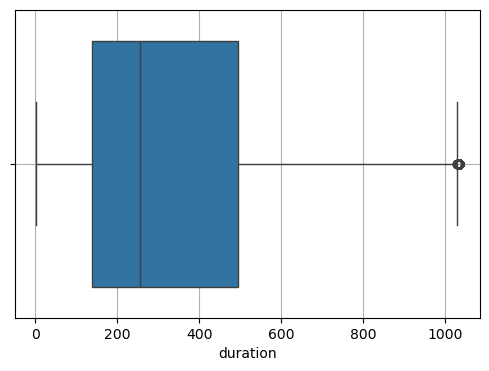

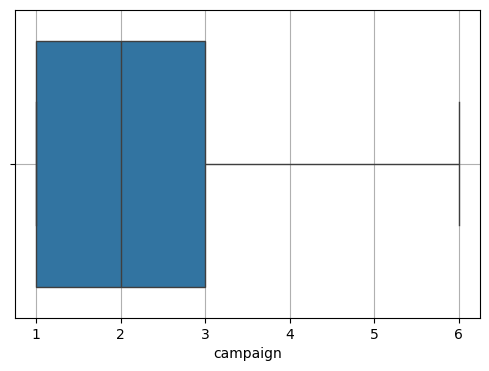

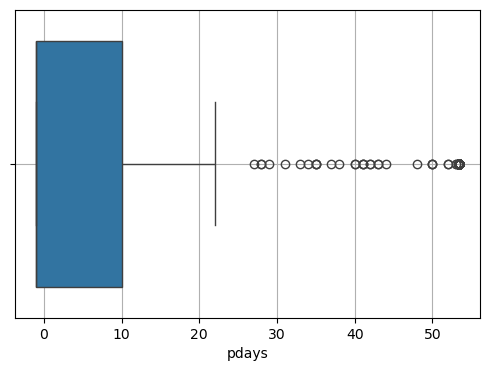

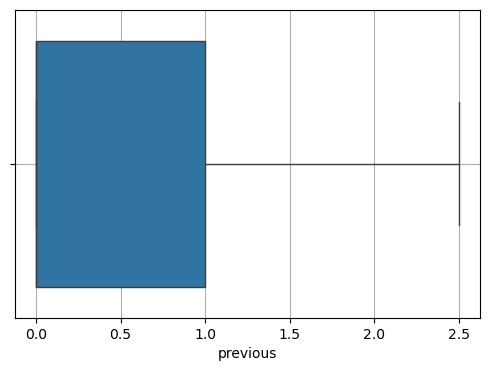

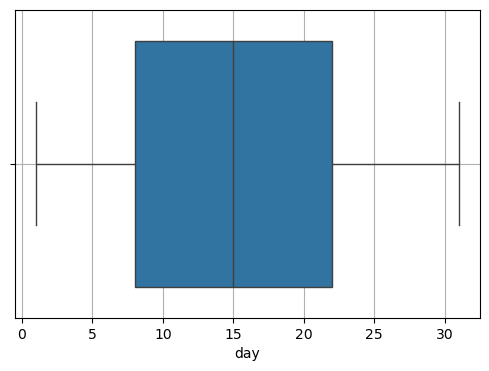

In [150]:
# Crear diagrames de caixa per visualitzar outliers a cada columna
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[column])
    plt.xlabel(column)
    plt.grid(True)
    plt.show() # S'han detectat outliers a 'balance', 'duration' i 'pdays'. La que sembla que té més és 'pdays'.

In [156]:
# Tractar outliers aplicant la técnica de Winsorització per mantenir l'estructura del dataset
# Funció per calcular límits IQR
def calculate_iqr_limits(df, columns):
    limits_dict = {}
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        limits_dict[column] = (lower_bound, upper_bound)
        
    return limits_dict

In [157]:
# Funció per winsoritzar dades
def winsorize_data(df, columns):
    limits_dict = calculate_iqr_limits(df, columns)
    
    for column, (lower_bound, upper_bound) in limits_dict.items():
        # Winsoritzar: Reemplaçar valors menors al límit inferior i majores al límit superior
        df[column] = np.clip(df[column], lower_bound, upper_bound)
        
    return df

In [158]:
# Definir les columnas a winsoritzar
columns_to_check = ['balance', 'duration', 'pdays']

# Aplicar winsorització a les columnes especificades
train_winsorized = winsorize_data(train4, columns_to_check)

# Guardar el DataFrame en un archiu CSV
train_winsorized.to_csv('bank_dataset_X_train_stand.csv', index=False)

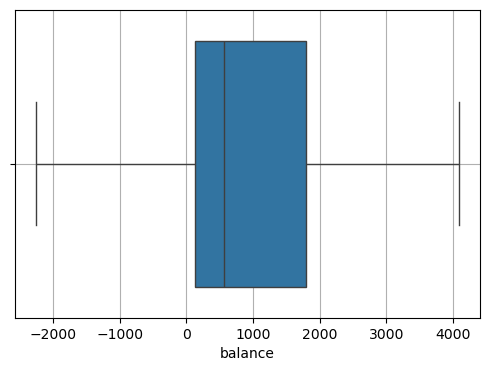

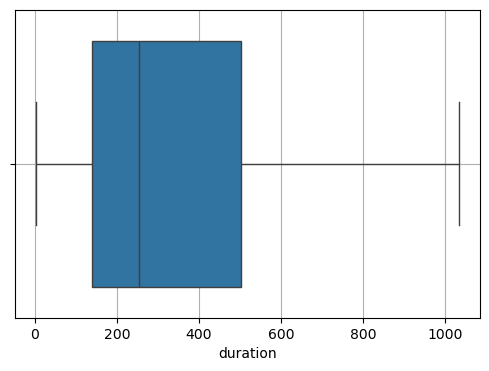

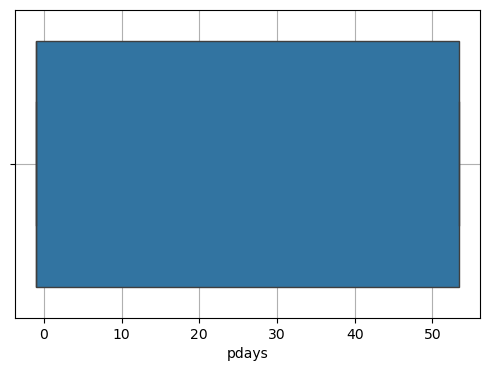

In [160]:
# Comprobar que no hi hagi outliers
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train4[column])
    plt.xlabel(column)
    plt.grid(True)
    plt.show() # No es detecten outliers

In [161]:
# Mostrar les primeres 5 filas del DataFrame `train4`
train4.head()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,...,default_no,default_yes,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown,contact_nan
8771,25.0,483.0,30.0,68.0,1.0,53.375,1.0,3.0,2.0,3.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823,74.5,4087.0,23.0,282.0,2.0,-1.000,0.0,9.0,2.0,0.0,...,True,False,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
9911,28.0,4.0,27.0,133.0,5.0,-1.000,0.0,5.0,2.0,0.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5111,27.0,1595.0,29.0,196.0,2.0,53.375,2.0,11.0,2.0,3.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5682,36.0,13.0,18.0,106.0,1.0,-1.000,0.0,10.0,3.0,0.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
# Obtenir una descripció estadística del DataFrame `train4`
train4.describe()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped_encoded,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown,contact_nan
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,4021.000000,4021.000000,4021.000000,4021.000000
mean,40.956113,1155.190327,15.424093,356.317510,2.248545,12.842085,0.491043,5.188983,2.103448,0.556202,1.865652,0.120466,0.566055,0.313032,0.000448,0.400398,0.039045,0.115892,0.444666
std,11.699717,1364.910971,8.348250,292.236609,1.511464,23.622936,0.893981,2.574886,0.790599,1.012732,0.617725,0.325578,0.495729,0.463831,0.021162,0.490040,0.193726,0.320135,0.496990
min,6.500000,-2257.000000,1.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,126.000000,8.000000,139.000000,1.000000,-1.000000,0.000000,4.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,560.000000,15.000000,254.000000,2.000000,-1.000000,0.000000,5.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1794.000000,21.000000,503.000000,3.000000,53.375000,1.000000,7.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,74.500000,4087.000000,31.000000,1033.000000,6.000000,53.375000,2.500000,11.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**5.2 Estandarització de variables numériques del conjunt train**

In [166]:
# Convé estandaritzar les variables numèriques que tenen una escala àmplia i que podrien afectar els models
# Especificar les columnes numèriques a estandarditzar
columns_to_standardize = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

In [167]:
# Inicialitzar l'escalador
scaler = StandardScaler()
# Aplicar l'estandardització només a les columnes numèriques
train4[columns_to_standardize] = scaler.fit_transform(train4[columns_to_standardize])
# Guardar el DataFrame estandaritzat en el mateix archiu CSV
train4.to_csv('bank_dataset_X_train_stand.csv', index=False)

In [168]:
# Verificar estandarització.
train4.describe()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped_encoded,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown,contact_nan
count,2.233000e+03,2.233000e+03,2.233000e+03,2.233000e+03,2.233000e+03,2.233000e+03,2.233000e+03,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,4021.000000,4021.000000,4021.000000,4021.000000
mean,1.833633e-16,8.750526e-18,-7.795923e-17,4.693464e-17,-1.256894e-16,2.863809e-17,3.818411e-17,5.188983,2.103448,0.556202,1.865652,0.120466,0.566055,0.313032,0.000448,0.400398,0.039045,0.115892,0.444666
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,2.574886,0.790599,1.012732,0.617725,0.325578,0.495729,0.463831,0.021162,0.490040,0.193726,0.320135,0.496990
min,-2.945698e+00,-2.500496e+00,-1.728185e+00,-1.209283e+00,-8.262347e-01,-5.860908e-01,-5.494000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.656697e-01,-7.542037e-01,-8.894986e-01,-7.438020e-01,-8.262347e-01,-5.860908e-01,-5.494000e-01,4.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.527219e-01,-4.361630e-01,-5.081163e-02,-3.501972e-01,-1.644764e-01,-5.860908e-01,-5.494000e-01,5.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.876824e-01,4.681278e-01,6.680629e-01,5.020430e-01,4.972819e-01,1.716213e+00,5.694420e-01,7.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.867710e+00,2.148467e+00,1.866187e+00,2.316048e+00,2.482557e+00,1.716213e+00,2.247705e+00,11.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


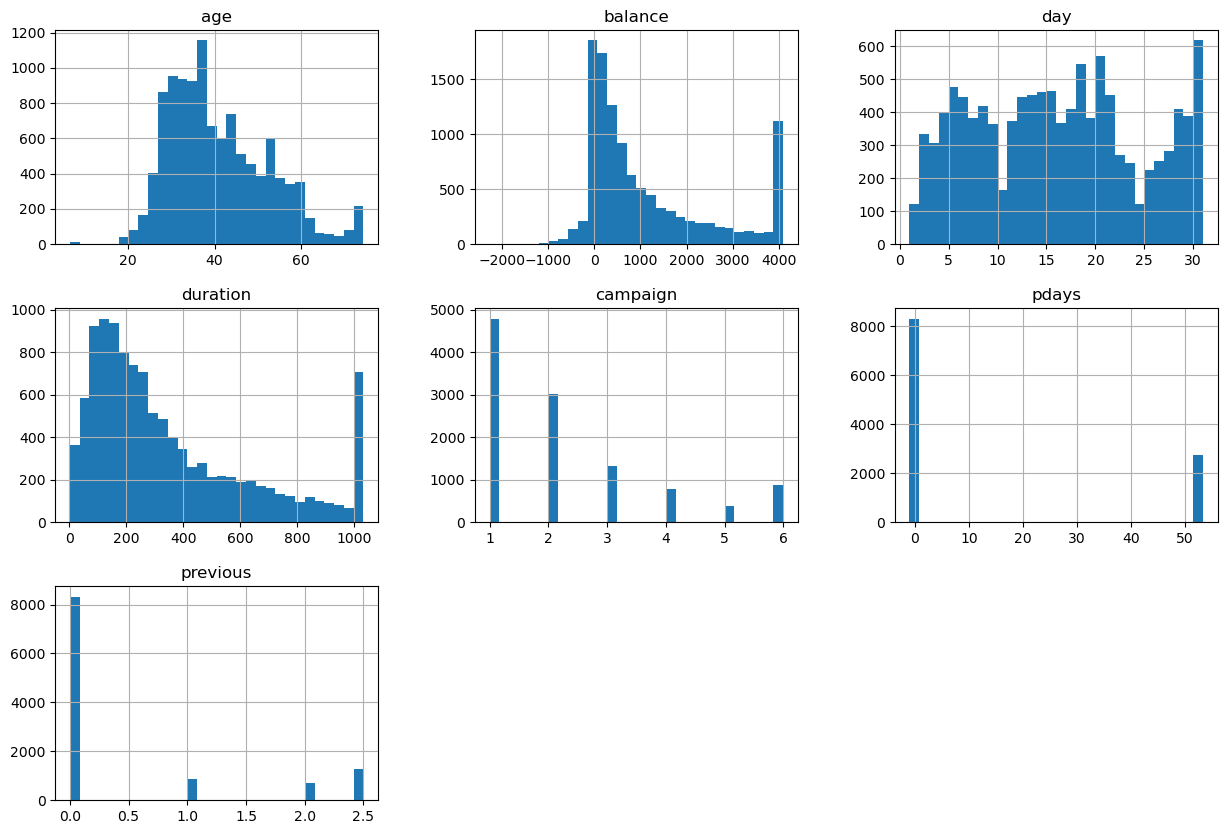

In [174]:
# Revisar el resultat amb histogrames
# Crear una figura con subgráficos para cada columna numérica
df.hist(bins=30, figsize=(15, 10))
columns_to_plot = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
plt.show()

****
**5.3 Tractactament d'outliers al conjunt test**

In [176]:
# Aplicar winsorització
# Aplicar winsorización a las columnas especificadas
test_winsorized = winsorize_data(test4, columns_to_check)

# Guardar el DataFrame en un archivu CSV
test_winsorized.to_csv('bank_dataset_X_test_stand.csv', index=False)

**5.4 Estandarització de variables numériques del conjunt train**

In [177]:
# Aplicar l'estandarització nomes a las columnes numéricas
columns_to_standardize = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
test4[columns_to_standardize] = scaler.transform(test4[columns_to_standardize])

# Guardar el DataFrame estandarizado en el mismo archivo CSV
test4.to_csv('bank_dataset_X_test_stand.csv', index=False)

# Verificar estandarización. Recordar que no se estandariza la variable objetivo
test4.head()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,...,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes,marital_divorced,marital_married,marital_single,marital_unknown
8771,-1.364109,-0.492590,1.746375,-0.986810,-0.826235,1.716213,0.569442,3.0,2.0,3.0,...,False,True,True,False,True,False,NaN,NaN,NaN,NaN
2823,2.867710,2.148467,0.907688,-0.254363,-0.164476,-0.586091,-0.549400,9.0,2.0,0.0,...,True,False,True,False,True,False,NaN,NaN,NaN,NaN
9911,-1.107635,-0.843607,1.386937,-0.764338,1.820798,-0.586091,-0.549400,5.0,2.0,0.0,...,True,False,False,True,True,False,NaN,NaN,NaN,NaN
5111,-1.193126,0.322298,1.626562,-0.548711,-0.164476,1.716213,1.688284,11.0,2.0,3.0,...,True,False,True,False,True,False,NaN,NaN,NaN,NaN
5682,-0.423705,-0.837011,0.308626,-0.856750,-0.826235,-0.586091,-0.549400,10.0,3.0,0.0,...,False,True,True,False,True,False,NaN,NaN,NaN,NaN


****